# Statistische Tests


---
### Der Einstichrproben-Gauss-Test

Seien $X_1,\ldots,X_N \sim N(\mu,\sigma^2)$ unabhängige Zufallsvariablen.

Wir nehmen, dass die Varianz $\sigma^2$ bekannt ist.

Dann können wir den Gauss-Test verwenden, um Aussagen über den Erwartungswert $\mu$ zu treffen. 

Wir machen ein Beispiel mit $N=1000$ **künstlichen generierten Daten** für $\mu = -5$ und $\sigma^2 = 2$:

In [38]:
N = 1000
mu = -5
sigma = sqrt(2)

x = rnorm(N, mu, sigma)

Zunächst betrachten wir die Daten in einem Histogramm.

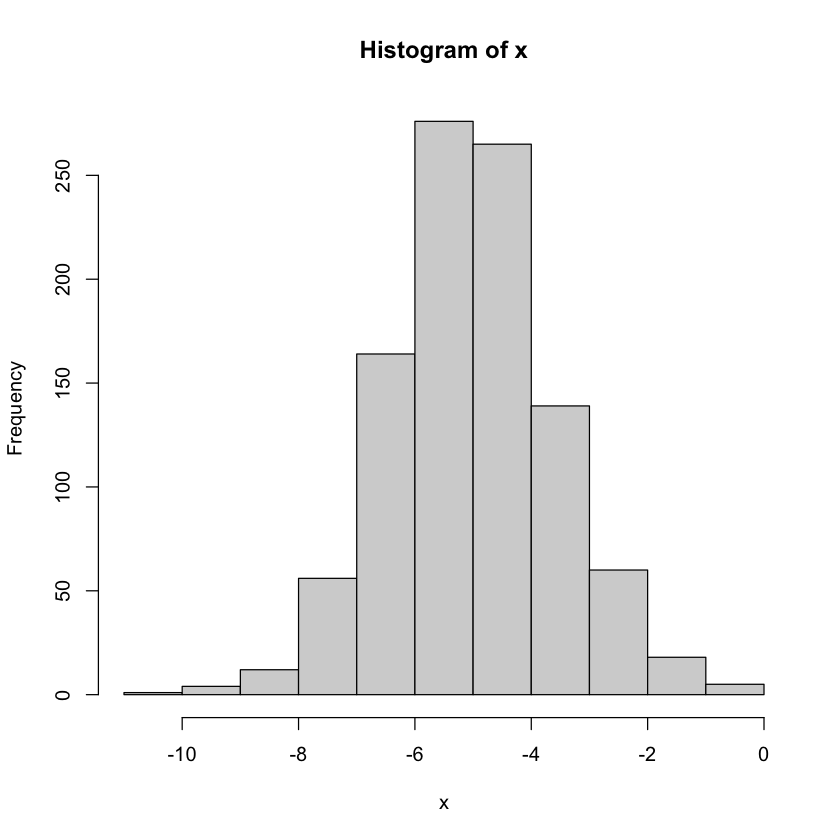

In [39]:
hist(x)

Der empirische Mittelwert der Daten ist

In [40]:
x_bar = mean(x)
x_bar

[1] -5.01359

Wir fragen uns nun, ob der theoretische Mittelwert $\mu$ größer als -6 ist. 

Dabei nehmen wir an, dass $\sigma^2 = 2$ bekannt ist.

Dazu können wir den **Gauss-Test** verwenden. 

Wir geben die Alternativhypothese mit der Option `alternative` an. Diese muss eine von `"two.sided", "less", "greater"` sein.

Da wir unsere Vermutung mit der Alternativhypothese modellieren, wählen wir `alternative = "greater"`.

In [41]:
library(compositions)
Gauss.test(x, mean = -6, sd=sigma, alternative = "greater")


	one sample Gauss-test

data:  x
T = -5.0136, mean = -6.0000, sd = 1.4142, p-value = 1e-06
alternative hypothesis: greater


Der p-Wert ist gleich $10^{-6}$. 

Das heißt, dass wir die Alternativhypothese mit einem Signifikanzniveau von $\alpha = 10^{-6}$ akzeptieren können. 

Die Teststatistik fällt in einen Ablehnungsbereich von Wahrscheinlichkeit $10^{-6}$.

---

Wir testen, jetzt ob der Mittelwert $\mu \neq -5.1$ ist. 

D.h. $H_0 = \{\mu = -5.1\}$.

In [42]:
Gauss.test(x, mean = -5.1, sd=sigma, alternative = "two.sided")


	one sample Gauss-test

data:  x
T = -5.0136, mean = -5.1000, sd = 1.4142, p-value = 0.05334
alternative hypothesis: two.sided


---
#### Der Zweistichproben-Gauss-Test

Wir generieren ein weiteres Sample von Daten mit $\mu_2 = -4$.

In [43]:
mu_2 = -4
y = rnorm(N, mu_2, sigma)
c(mean(x), mean(y))

[1] -5.013590 -4.061042

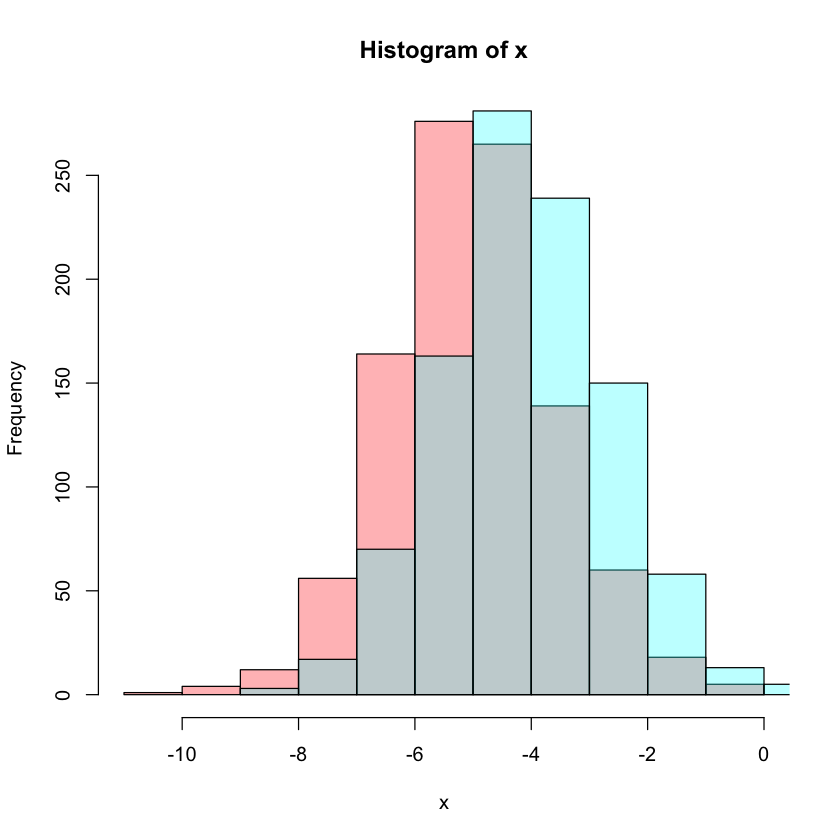

In [44]:
hist(x, col = rgb(1,0,0,0.3))
hist(y, col = rgb(0,1,1,0.3), add =TRUE)

Wir vermuten, dass $\mu\neq\mu_2$. Dies testen wir mit dem zweiseitigen Gauss-Test.

In [45]:
Gauss.test(x, y, sd = sigma, alternative = "two.sided")


	one sample Gauss-test

data:  x
T = -0.95255, mean = 0.0000, sd = 1.4142, p-value = 1e-06
alternative hypothesis: two.sided


Durch den p-Wert schliessen wir, dass $\mu\neq\mu_1$ signifikant ist.

---

### Der t-Test

Falls $\sigma^2$ unbekannt ist benutzen wir den t-Test.

#### Der Einstichproben t-Test

Test, ob $\mu \geq -6$:

In [56]:
t.test(x, mu=-6, alternative = "greater")


	One Sample t-test

data:  x
t = 22.083, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is greater than -6
95 percent confidence interval:
 -5.08713      Inf
sample estimates:
mean of x 
 -5.01359 


Test, ob $\mu\neq\mu_2$, wobei bekannt ist, dass beide Stichproben die gleiche Varianz haben.

In [49]:
t.test(x, y, var.equal = TRUE, alternative = "two.sided")


	Two Sample t-test

data:  x and y
t = -14.858, df = 1998, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0782755 -0.8268207
sample estimates:
mean of x mean of y 
-5.013590 -4.061042 


Test, ob $\mu\neq\mu_2$, wobei **nicht** bekannt ist, dass beide Stichproben die gleiche Varianz haben.

In [58]:
t.test(x, y, var.equal = FALSE, alternative = "two.sided")


	Welch Two Sample t-test

data:  x and y
t = -14.858, df = 1996.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0782755 -0.8268207
sample estimates:
mean of x mean of y 
-5.013590 -4.061042 


----

### Wie realistisch ist die Annahme normalverteilter Daten?

Für große Stichproben $N$ ist die Annahme durch den zentralen Grenzwertsatz gerechtfertigt.

**Zentraler Grenzwertsatz** Sei $X_1,X_2\ldots$ eine Folge von i.i.d. Zufallsvariablen mit 

$$\mu:=\mathbb E(X_1) \quad\text{und}\quad \sigma^2 := \mathrm{Var}(X_1).$$

Definiere $S_n:=X_1+\cdots+X_n$ und
$$Z_n = \frac{1}{\sigma \sqrt{n}}(S_n - n\mu).$$

Dann gilt 
$$\lim_{n\to\infty} P(Z_n\leq x) = F(x),$$

wobei $F(x)$ die Verteilungsfunktion einer $N(0,1)$-Zufallsvariable ist.


---
Der zentrale Grenzwertsatz sagt aus, dass sich für große $N$ die Teststatistiken des Gauss-Test und des t-Tests sich verhalten, als ob sie von normalverteilten Zufallsvariablen gezogen wären, auch wenn sie es nicht sind.

---